In [1]:
import sys
sys.path.append('..')

In [87]:

import shap

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O(e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from pathlib import Path
from sklearn.model_selection import train_test_split


In [4]:
DATA_DIR = Path(r'../../../AI_Methodology/AI_METHODOLY/data/external/')
MODEL_DIR=Path(r'../../../AI_Methodology/AI_METHODOLY//models/')

In [5]:
df_master = pd.read_excel(DATA_DIR/"Employee_Perfomance.xls",index_col='EmpNumber')

In [6]:
df = df_master.copy()

In [9]:
target = df['PerformanceRating']
train = df.drop(['PerformanceRating'],axis=1)


In [10]:
train

Age  Gender EducationBackground MaritalStatus    EmpDepartment  \
EmpNumber                                                                   
E1001000    32    Male           Marketing        Single            Sales   
E1001006    47    Male           Marketing        Single            Sales   
E1001007    40    Male       Life Sciences       Married            Sales   
E1001009    41    Male     Human Resources      Divorced  Human Resources   
E1001010    60    Male           Marketing        Single            Sales   
...        ...     ...                 ...           ...              ...   
E100992     27  Female             Medical      Divorced            Sales   
E100993     37    Male       Life Sciences        Single      Development   
E100994     50    Male             Medical       Married      Development   
E100995     34  Female             Medical        Single     Data Science   
E100998     24  Female       Life Sciences        Single            Sales   

                 EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
EmpNumber                                                               
E1001000    Sales Executive           Travel_Rarely                10   
E1001006    Sales Executive           Travel_Rarely                14   
E1001007    Sales Executive       Travel_Frequently                 5   
E1001009            Manager           Travel_Rarely                10   
E1001010    Sales Executive           Travel_Rarely                16   
...                     ...                     ...               ...   
E100992     Sales Executive       Travel_Frequently                 3   
E100993    Senior Developer           Travel_Rarely                10   
E100994    Senior Developer           Travel_Rarely                28   
E100995      Data Scientist           Travel_Rarely                 9   
E100998     Sales Executive           Travel_Rarely                 3   

           EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
EmpNumber                                                 ...   
E1001000                   3                           4  ...   
E1001006                   4                           4  ...   
E1001007                   4                           4  ...   
E1001009                   4                           2  ...   
E1001010                   4                           1  ...   
...                      ...                         ...  ...   
E100992                    1                           4  ...   
E100993                    2                           4  ...   
E100994                    1                           4  ...   
E100995                    3                           4  ...   
E100998                    2                           1  ...   

           EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
EmpNumber                                                          
E1001000                         12                            4   
E1001006                         12                            4   
E1001007                         21                            3   
E1001009                         15                            2   
E1001010                         14                            4   
...                             ...                          ...   
E100992                          20                            2   
E100993                          17                            1   
E100994                          11                            3   
E100995                          14                            2   
E100998                          14                            1   

           TotalWorkExperienceInYears  TrainingTimesLastYear  \
EmpNumber                                                      
E1001000                           10                      2   
E1001006                           20                      2   
E1001007                           20                      2   
E1001009

In [11]:
from src.app.preprocess import preprocess

In [12]:
preprocessed_df = preprocess(train, MODEL_DIR)
preprocessed_df.head()


Age  DistanceFromHome  EmpEducationLevel  \
EmpNumber                                             
E1001000    32                10                  3   
E1001006    47                14                  4   
E1001007    40                 5                  4   
E1001009    41                10                  4   
E1001010    60                16                  4   

           EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
EmpNumber                                                                 
E1001000                            4             55                  3   
E1001006                            4             42                  3   
E1001007                            4             48                  2   
E1001009                            2             73                  2   
E1001010                            1             84                  3   

           EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
EmpNumber                                                        
E1001000             2                   4                   1   
E1001006             2                   1                   2   
E1001007             3                   1                   5   
E1001009             5                   4                   3   
E1001010             2                   1                   8   

           EmpLastSalaryHikePercent  ...  EmpJobRole_Senior Manager R&D  \
EmpNumber                            ...                                  
E1001000                         12  ...                              0   
E1001006                         12  ...                              0   
E1001007                         21  ...                              0   
E1001009                         15  ...                              0   
E1001010                         14  ...                              0   

           EmpJobRole_Technical Architect  EmpJobRole_Technical Lead  \
EmpNumber                                                              
E1001000                                0                          0   
E1001006                                0                          0   
E1001007                                0                          0   
E1001009                                0                          0   
E1001010                                0                          0   

           BusinessTravelFrequency_Non-Travel  \
EmpNumber                                       
E1001000                                    0   
E1001006                                    0   
E1001007                                    0   
E1001009                                    0   
E1001010                                    0   

           BusinessTravelFrequency_Travel_Frequently  \
EmpNumber                                              
E1001000                                           0   
E1001006                                           0   
E1001007                                           1   
E1001009                                           0   
E1001010                                           0   

           BusinessTravelFrequency_Travel_Rarely  OverTime_No  OverTime_Yes  \
EmpNumber                                                                     
E1001000                                       1            1             0   
E1001006                                       1            1             0   
E1001007                                       0            0             1   
E1001009                                       1            1             0   
E1001010                                       1            1             0   

           Attrition_No  Attrition_Yes  
EmpNumber                               
E1001000              1              0  
E1001006              1              0  
E1001007              1              0  
E1001009              1              0  
E1001010              1              0  

[5 rows x 61 columns]

In [ ]:
E1001006 E1001009 E1001010

In [13]:
shap.initjs()

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,scale, StandardScaler

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [23]:
x_train , x_test , y_train , y_test = train_test_split(preprocessed_df,target,test_size=0.2)

In [24]:
rfc = RandomForestClassifier()

In [25]:
# rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [26]:
rfc.fit(x_train,y_train)

pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.


RandomForestClassifier()

In [40]:
# Fits the explainer
explainer = shap.TreeExplainer(rfc)


In [43]:
 shap_values = explainer.shap_values(preprocessed_df)

In [44]:
shap.force_plot(explainer.expected_value[1], shap_values[1],preprocessed_df)

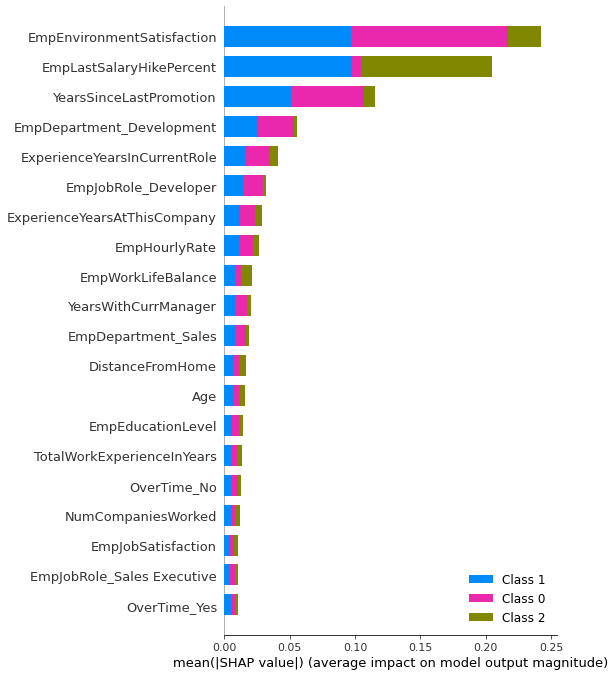

In [45]:
shap.summary_plot(shap_values, x_train)

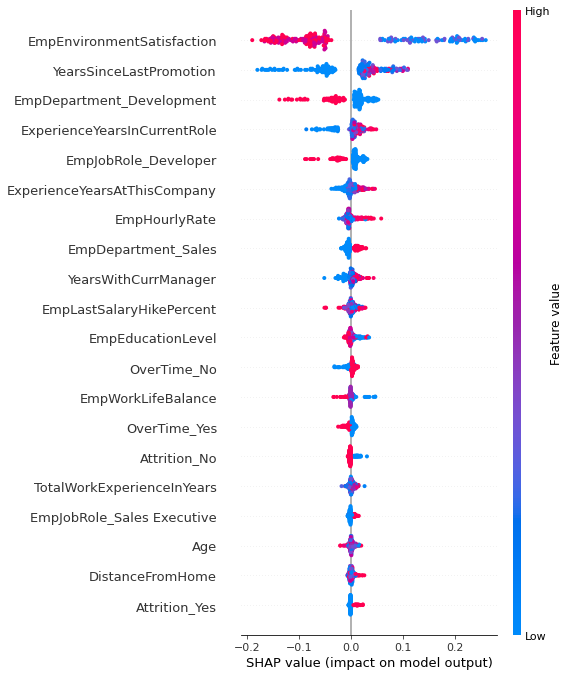

In [50]:
shap_values = explainer.shap_values(x_test[0:1000], check_additivity=False)

shap.summary_plot(shap_values[0], x_test[0:1000])

In [61]:
preprocessed_df.columns

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Gender_Female', 'Gender_Male',
       'EducationBackground_Human Resources',
       'EducationBackground_Life Sciences', 'EducationBackground_Marketing',
       'EducationBackground_Medical', 'EducationBackground_Other',
       'EducationBackground_Technical Degree', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'EmpDepartment_Data Science', 'EmpDepartment_Development',
       'EmpDepartment_Finance', 'EmpDepartment_Human Resources',
       'EmpDepartment_Research & Dev

In [76]:
OneEMP=preprocessed_df.loc[['E1001000']]

In [77]:
shap_values = explainer.shap_values(OneEMP)

In [78]:
shap.force_plot(explainer.expected_value[1], shap_values[1],OneEMP)

## Filtering for different employees

In [79]:
secondemp=preprocessed_df.loc[['E1001006']]

In [80]:
shap_values = explainer.shap_values(secondemp)

In [81]:
shap.force_plot(explainer.expected_value[1], shap_values[1],OneEMP)

In [83]:
thirdemp=preprocessed_df.loc[['E1001009']]

In [84]:
shap_values = explainer.shap_values(thirdemp)

In [86]:
shap.force_plot(explainer.expected_value[2], shap_values[2],OneEMP)